# LAPTOP PRICE PREDICTION

### Objective
The aim of this model is to predict the price of laptops for different companies based on certain parameters. This model can also help new companies place their prices moderately on their laptops without having to undercharge their customers which could lead to loss for the company or overcharge which could in turn lead to customers not purchasing from them.

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
laptop_data = pd.read_csv(r"C:\Users\USER\Documents\archive (2)\laptopData.csv")
laptop_data.head(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8.0,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9.0,Acer,Ultrabook,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [4]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [5]:
laptop_data.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [6]:
# This is to locate where the missing values exist
laptop_data.loc[laptop_data.isnull().sum(),:]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
30,30.0,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
30,30.0,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
30,30.0,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
30,30.0,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
30,30.0,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
30,30.0,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
30,30.0,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
30,30.0,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
30,30.0,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
30,30.0,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672


In [7]:
laptop_data = laptop_data.dropna()
laptop_data 

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [8]:
# Dropping the null values has reduced the number of rows to 1273
laptop_data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
# There are no duplicate values
laptop_data.duplicated().sum()

0

In [10]:
# Dropping the Unnamed column because of its irrelevance
laptop_data = laptop_data.drop(["Unnamed: 0"], axis=1)
laptop_data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [11]:
# Extracting the processor information and clock speed using regex
laptop_data[['CpuProcessor', 'CpuSpeed']] = laptop_data['Cpu'].str.extract(r'(.+?)\s+(\d+\.\d+GHz|\d+GHz)')
laptop_data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,CpuProcessor,CpuSpeed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Intel Core i5,2.3GHz
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Intel Core i5,1.8GHz
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Intel Core i5 7200U,2.5GHz
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Intel Core i7,2.7GHz
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Intel Core i5,3.1GHz
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Intel Core i7 6500U,2.5GHz
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Intel Core i7 6500U,2.5GHz
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,Intel Celeron Dual Core N3050,1.6GHz
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,Intel Core i7 6500U,2.5GHz


In [12]:
# Extracting the Memory Size and Type into another column
laptop_data['MemorySize'] = laptop_data['Memory'].str.extract(r'(\d+\s*(?:GB|TB))', expand=False)
laptop_data['MemoryType'] = laptop_data['Memory'].str.replace(r'(\d+\s*(?:GB|TB))', '', regex=True).str.strip()
laptop_data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,CpuProcessor,CpuSpeed,MemorySize,MemoryType
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Intel Core i5,2.3GHz,128GB,SSD
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Intel Core i5,1.8GHz,128GB,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Intel Core i5 7200U,2.5GHz,256GB,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Intel Core i7,2.7GHz,512GB,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Intel Core i5,3.1GHz,256GB,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Intel Core i7 6500U,2.5GHz,128GB,SSD
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Intel Core i7 6500U,2.5GHz,512GB,SSD
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,Intel Celeron Dual Core N3050,1.6GHz,64GB,Flash Storage
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,Intel Core i7 6500U,2.5GHz,1TB,HDD


In [13]:
# Dropping the Memory column because the data already exists in the new columns we created
laptop_data = laptop_data.drop(["Memory", "Cpu"], axis=1)
laptop_data

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,CpuProcessor,CpuSpeed,MemorySize,MemoryType
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Intel Core i5,2.3GHz,128GB,SSD
1,Apple,Ultrabook,13.3,1440x900,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Intel Core i5,1.8GHz,128GB,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Intel Core i5 7200U,2.5GHz,256GB,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Intel Core i7,2.7GHz,512GB,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Intel Core i5,3.1GHz,256GB,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Intel Core i7 6500U,2.5GHz,128GB,SSD
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Intel Core i7 6500U,2.5GHz,512GB,SSD
1300,Lenovo,Notebook,14,1366x768,2GB,Intel HD Graphics,Windows 10,1.5kg,12201.1200,Intel Celeron Dual Core N3050,1.6GHz,64GB,Flash Storage
1301,HP,Notebook,15.6,1366x768,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,Intel Core i7 6500U,2.5GHz,1TB,HDD


In [14]:
# Function to convert TB to GB
def convert_memory_size(value):
    # Ensure the value is a string
    if isinstance(value, str):
        # Check if the value contains 'TB' and convert it to GB
        if 'TB' in value:
            # Extract the numeric part and multiply by 1024 to convert to GB
            value_in_gb = float(value.replace('TB', '').strip()) * 1024
            return f'{int(value_in_gb)}GB'
        # If already in GB, return as is
        elif 'GB' in value:
            return value
    return value  # Return original value for non-string types or None

# Applying the conversion function to the 'MemorySize' column
laptop_data['MemorySize'] = laptop_data['MemorySize'].apply(convert_memory_size)
laptop_data

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,CpuProcessor,CpuSpeed,MemorySize,MemoryType
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Intel Core i5,2.3GHz,128GB,SSD
1,Apple,Ultrabook,13.3,1440x900,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Intel Core i5,1.8GHz,128GB,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Intel Core i5 7200U,2.5GHz,256GB,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Intel Core i7,2.7GHz,512GB,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Intel Core i5,3.1GHz,256GB,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Intel Core i7 6500U,2.5GHz,128GB,SSD
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Intel Core i7 6500U,2.5GHz,512GB,SSD
1300,Lenovo,Notebook,14,1366x768,2GB,Intel HD Graphics,Windows 10,1.5kg,12201.1200,Intel Celeron Dual Core N3050,1.6GHz,64GB,Flash Storage
1301,HP,Notebook,15.6,1366x768,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,Intel Core i7 6500U,2.5GHz,1024GB,HDD


In [15]:
# Extracting the units from the values
laptop_data['Ram'] = laptop_data['Ram'].str.replace('GB', '', case=False)
laptop_data['Weight'] = laptop_data['Weight'].str.replace('kg', '', case=False)
laptop_data['CpuSpeed'] = laptop_data['CpuSpeed'].str.replace('GHz', '', case=False)
laptop_data['MemorySize'] = laptop_data['MemorySize'].str.replace('GB', '', case=False)
laptop_data

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,CpuProcessor,CpuSpeed,MemorySize,MemoryType
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3,128,SSD
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8,128,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5 7200U,2.5,256,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7,512,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,4,Intel HD Graphics 520,Windows 10,1.8,33992.6400,Intel Core i7 6500U,2.5,128,SSD
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,Intel HD Graphics 520,Windows 10,1.3,79866.7200,Intel Core i7 6500U,2.5,512,SSD
1300,Lenovo,Notebook,14,1366x768,2,Intel HD Graphics,Windows 10,1.5,12201.1200,Intel Celeron Dual Core N3050,1.6,64,Flash Storage
1301,HP,Notebook,15.6,1366x768,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Intel Core i7 6500U,2.5,1024,HDD


In [16]:
# Renaming the columns
laptop_data = laptop_data.rename(columns={'Company': 'CompanyName', 'Ram': 'Ram_GB', 'Weight': 'Weight_GB', 'CpuSpeed': 'CpuSpeed_GHz','MemorySize': 'MemorySize_GB'})
laptop_data

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,CpuSpeed_GHz,MemorySize_GB,MemoryType
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3,128,SSD
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8,128,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5 7200U,2.5,256,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7,512,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,4,Intel HD Graphics 520,Windows 10,1.8,33992.6400,Intel Core i7 6500U,2.5,128,SSD
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,Intel HD Graphics 520,Windows 10,1.3,79866.7200,Intel Core i7 6500U,2.5,512,SSD
1300,Lenovo,Notebook,14,1366x768,2,Intel HD Graphics,Windows 10,1.5,12201.1200,Intel Celeron Dual Core N3050,1.6,64,Flash Storage
1301,HP,Notebook,15.6,1366x768,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Intel Core i7 6500U,2.5,1024,HDD


In [17]:
# This is the number of unique values in each column
laptop_data.nunique()

CompanyName          19
TypeName              6
Inches               25
ScreenResolution     40
Ram_GB               10
Gpu                 110
OpSys                 9
Weight_GB           189
Price               777
CpuProcessor         93
CpuSpeed_GHz         29
MemorySize_GB        14
MemoryType           12
dtype: int64

In [18]:
# These are the specific unique values in each column
laptop_data['CompanyName'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [19]:
laptop_data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [20]:
# There is a null value present('?')
laptop_data['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [21]:
laptop_data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

In [22]:
# We skipped the Gpu, Weight_kg and Price column because it has a large number of unique values
laptop_data['Ram_GB'].unique()

array(['8', '16', '4', '2', '12', '64', '6', '32', '24', '1'],
      dtype=object)

In [23]:
laptop_data['CpuProcessor'].unique()

array(['Intel Core i5', 'Intel Core i5 7200U', 'Intel Core i7',
       'AMD A9-Series 9420', 'Intel Core i7 8550U', 'Intel Core i5 8250U',
       'Intel Core i3 6006U', 'Intel Core M m3', 'Intel Core i7 7500U',
       'Intel Core i3 7100U', 'Intel Core i5 7300HQ',
       'AMD E-Series E2-9000e', 'Intel Core i7 8650U',
       'Intel Atom x5-Z8300', 'AMD E-Series E2-6110',
       'AMD A6-Series 9220', 'Intel Celeron Dual Core N3350',
       'Intel Core i3 7130U', 'Intel Core i7 7700HQ', 'AMD Ryzen 1700',
       'Intel Pentium Quad Core N4200', 'Intel Celeron Dual Core N3060',
       'AMD FX 9830P', 'Intel Core i7 7560U', 'AMD E-Series 6110',
       'Intel Core i5 6200U', 'Intel Core M 6Y75', 'Intel Core i5 7500U',
       'Intel Core i7 6920HQ', 'Intel Core i5 7Y54',
       'Intel Core i7 7820HK', 'Intel Xeon E3-1505M V6',
       'Intel Core i7 6500U', 'AMD E-Series 9000e',
       'AMD A10-Series A10-9620P', 'AMD A6-Series A6-9220',
       'Intel Core i7 6600U', 'Intel Celeron Dual Core 3

In [24]:
laptop_data['CpuSpeed_GHz'].unique()

array(['2.3', '1.8', '2.5', '2.7', '3.1', '3', '2.2', '1.6', '2', '2.8',
       '1.2', '2.9', '2.4', '1.5', '1.9', '1.44', '1.1', '2.0', '1.3',
       '2.6', '3.6', '1.60', '3.2', '1.0', '2.1', '0.9', '1.92', '2.50',
       '2.70'], dtype=object)

In [25]:
laptop_data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [26]:
laptop_data['MemorySize_GB'].unique()

array(['128', '256', '512', '500', '1024', '64', '32', '2048', '0', '16',
       '180', nan, '240', '8', '508'], dtype=object)

In [27]:
laptop_data['MemoryType'].unique()

array(['SSD', 'Flash Storage', 'HDD', 'SSD +   HDD', 'SSD +   SSD',
       '1. Hybrid', 'Flash Storage +   HDD', 'HDD +   HDD', '?', 'Hybrid',
       '1. HDD', 'SSD +  1. Hybrid'], dtype=object)

#### *Investigating Odd Values Found In Each Columns*

In [28]:
# Counting the occurrences of '?' in the Inches column
laptop_data['Inches'].value_counts()['?']

1

In [29]:
# Locating the exact position of the value
laptop_data[laptop_data['Inches'] == '?']

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,CpuSpeed_GHz,MemorySize_GB,MemoryType
476,Dell,Workstation,?,Full HD 1920x1080,8,Nvidia Quadro M1200,Windows 10,1.78,128298.24,Intel Core i7 7700HQ,2.8,256,SSD


In [30]:
# Dropping the row containing the'?' value. Our row now becomes 1272
laptop_data= laptop_data[laptop_data['Inches'] != '?']
laptop_data

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,CpuSpeed_GHz,MemorySize_GB,MemoryType
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3,128,SSD
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8,128,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5 7200U,2.5,256,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7,512,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,4,Intel HD Graphics 520,Windows 10,1.8,33992.6400,Intel Core i7 6500U,2.5,128,SSD
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,Intel HD Graphics 520,Windows 10,1.3,79866.7200,Intel Core i7 6500U,2.5,512,SSD
1300,Lenovo,Notebook,14,1366x768,2,Intel HD Graphics,Windows 10,1.5,12201.1200,Intel Celeron Dual Core N3050,1.6,64,Flash Storage
1301,HP,Notebook,15.6,1366x768,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Intel Core i7 6500U,2.5,1024,HDD


In [31]:
# Counting the occurrences of 'No OS' in the OpSys column
laptop_data['OpSys'].value_counts()['No OS']

63

In [32]:
# Locating the exact position of the value
laptop_data[laptop_data['OpSys'] == 'No OS']
# We won't be dropping these rows because there is a possibility of having a laptop with No Operating Sysytem.

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,CpuSpeed_GHz,MemorySize_GB,MemoryType
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5 7200U,2.5,256,SSD
10,HP,Notebook,15.6,1366x768,4,Intel HD Graphics 620,No OS,1.86,20986.9920,Intel Core i5 7200U,2.5,500,HDD
11,HP,Notebook,15.6,Full HD 1920x1080,4,Intel HD Graphics 520,No OS,1.86,18381.0672,Intel Core i3 6006U,2,500,HDD
18,Lenovo,Notebook,15.6,Full HD 1920x1080,8,Nvidia GeForce 940MX,No OS,2.2,26586.7200,Intel Core i3 7100U,2.4,1024,HDD
22,HP,Notebook,15.6,1366x768,4,AMD Radeon R2,No OS,1.86,13746.2400,AMD E-Series E2-9000e,1.5,500,HDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,Lenovo,Notebook,15.6,Full HD 1920x1080,8,Nvidia GeForce 940MX,No OS,2.2,37775.5200,Intel Core i7 7500U,2.7,1024,HDD
1196,Lenovo,Notebook,15.6,1366x768,4,AMD Radeon R5 M430,No OS,1.9,19607.0400,Intel Core i3 6006U,2,1024,HDD
1201,Lenovo,Notebook,15.6,1366x768,8,Nvidia GeForce 920MX,No OS,2.2,33513.1200,Intel Core i7 6500U,2.5,500,HDD
1217,Lenovo,Notebook,17.3,1600x900,8,Intel HD Graphics 620,No OS,2.8,28717.9200,Intel Core i5 7200U,2.5,1024,HDD


In [33]:
# Counting the occurrences of '0 GB' in the Inches column
laptop_data['MemorySize_GB'].value_counts()['0']

10

In [34]:
# Locating the exact position of the value
laptop_data[laptop_data['MemorySize_GB'] == '0']

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,CpuSpeed_GHz,MemorySize_GB,MemoryType
151,Dell,Gaming,15.6,Full HD 1920x1080,8,Nvidia GeForce GTX 1050,Windows 10,2.62,47898.7200,Intel Core i7 7700HQ,2.8,0,1. Hybrid
1010,Dell,Gaming,15.6,Full HD 1920x1080,8,Nvidia GeForce GTX 1050,Windows 10,2.65,50562.7200,Intel Core i5 7300HQ,2.5,0,1. Hybrid
1075,Lenovo,Notebook,17.3,1600x900,8,AMD Radeon R5 M330,Windows 10,3.0,35111.5200,Intel Core i5 6200U,2.3,0,1. HDD
1135,Lenovo,Notebook,15.6,Full HD 1920x1080,16,AMD Radeon R7 M360,Windows 10,2.5,58554.7200,Intel Core i7 6500U,2.5,0,1. Hybrid
1158,Lenovo,Notebook,15.6,Full HD 1920x1080,8,AMD Radeon R5 M330,Windows 10,2.5,42010.7472,Intel Core i5 6200U,2.3,0,1. Hybrid
1176,Lenovo,Notebook,15.6,Full HD 1920x1080,4,Intel HD Graphics 520,Windows 7,2.32,43956.0000,Intel Core i7 6500U,2.5,0,1. Hybrid
1258,Lenovo,Notebook,15.6,Full HD 1920x1080,8,AMD Radeon R5 M330,Windows 7,2.32,47685.6000,Intel Core i7 6500U,2.5,0,1. Hybrid
1266,HP,Notebook,15.6,Full HD 1920x1080,6,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,AMD A9-Series 9410,2.9,0,1. Hybrid
1280,HP,Notebook,15.6,Full HD 1920x1080,6,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,AMD A9-Series 9410,2.9,0,1. Hybrid
1294,HP,Notebook,15.6,Full HD 1920x1080,6,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,AMD A9-Series 9410,2.9,0,1. Hybrid


In [35]:
# Dropping the row containing the '0' value because it is not possible to have such Memory Size in a laptop.
laptop_data= laptop_data[laptop_data['MemorySize_GB'] != '0']
laptop_data

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,CpuSpeed_GHz,MemorySize_GB,MemoryType
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3,128,SSD
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8,128,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5 7200U,2.5,256,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7,512,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,4,Intel HD Graphics 520,Windows 10,1.8,33992.6400,Intel Core i7 6500U,2.5,128,SSD
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,Intel HD Graphics 520,Windows 10,1.3,79866.7200,Intel Core i7 6500U,2.5,512,SSD
1300,Lenovo,Notebook,14,1366x768,2,Intel HD Graphics,Windows 10,1.5,12201.1200,Intel Celeron Dual Core N3050,1.6,64,Flash Storage
1301,HP,Notebook,15.6,1366x768,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Intel Core i7 6500U,2.5,1024,HDD


In [36]:
# Counting the occurrences of 'nan' in the Memory Size column
laptop_data['MemorySize_GB'].isnull().sum()

1

In [37]:
# Locating the exact position of the value
laptop_data[laptop_data['MemorySize_GB'].isnull()]

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,CpuSpeed_GHz,MemorySize_GB,MemoryType
770,Dell,Notebook,15.6,Full HD 1920x1080,16,AMD Radeon R7 M445,Windows 10,2.3,62938.0656,Intel Core i7 7500U,2.7,NaN,?


In [38]:
laptop_data.isnull().sum()

CompanyName         0
TypeName            0
Inches              0
ScreenResolution    0
Ram_GB              0
Gpu                 0
OpSys               0
Weight_GB           0
Price               0
CpuProcessor        0
CpuSpeed_GHz        0
MemorySize_GB       1
MemoryType          0
dtype: int64

In [39]:
# Counting the occurrences of '?' in the Memory Type column
laptop_data['MemoryType'].value_counts()['?']

1

In [40]:
# Locating the exact position of the value
laptop_data[laptop_data['MemoryType'] == '?']

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,CpuSpeed_GHz,MemorySize_GB,MemoryType
770,Dell,Notebook,15.6,Full HD 1920x1080,16,AMD Radeon R7 M445,Windows 10,2.3,62938.0656,Intel Core i7 7500U,2.7,NaN,?


In [41]:
# Dropping the row containing the missing value eliminates the 'nan' and '?' values.
laptop_data = laptop_data.dropna()
laptop_data 

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,CpuSpeed_GHz,MemorySize_GB,MemoryType
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3,128,SSD
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8,128,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5 7200U,2.5,256,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7,512,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,4,Intel HD Graphics 520,Windows 10,1.8,33992.6400,Intel Core i7 6500U,2.5,128,SSD
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,Intel HD Graphics 520,Windows 10,1.3,79866.7200,Intel Core i7 6500U,2.5,512,SSD
1300,Lenovo,Notebook,14,1366x768,2,Intel HD Graphics,Windows 10,1.5,12201.1200,Intel Celeron Dual Core N3050,1.6,64,Flash Storage
1301,HP,Notebook,15.6,1366x768,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Intel Core i7 6500U,2.5,1024,HDD


In [42]:
laptop_data.isnull().sum()

CompanyName         0
TypeName            0
Inches              0
ScreenResolution    0
Ram_GB              0
Gpu                 0
OpSys               0
Weight_GB           0
Price               0
CpuProcessor        0
CpuSpeed_GHz        0
MemorySize_GB       0
MemoryType          0
dtype: int64

## Data Visualization

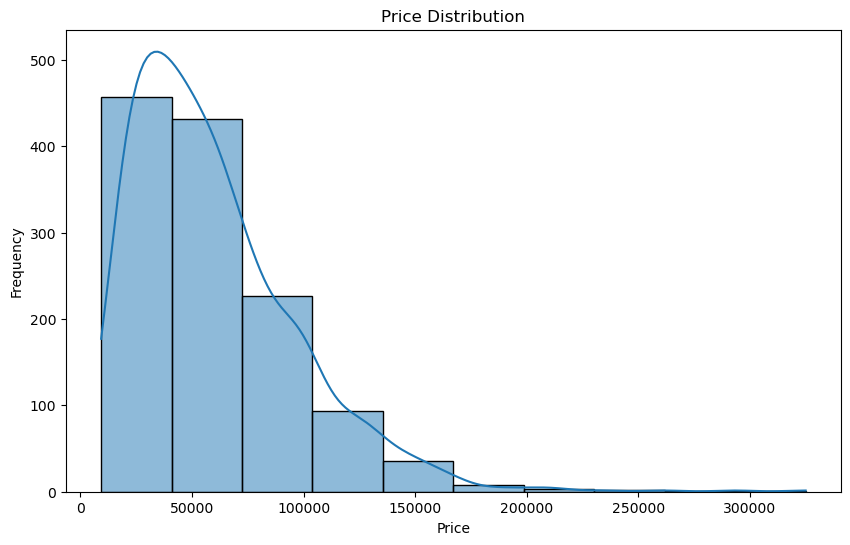

In [43]:
# This is effective for understanding the general price range and the frequency of prices falling within certain intervals.
plt.figure(figsize=(10, 6))
sns.histplot(laptop_data['Price'], bins=10, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

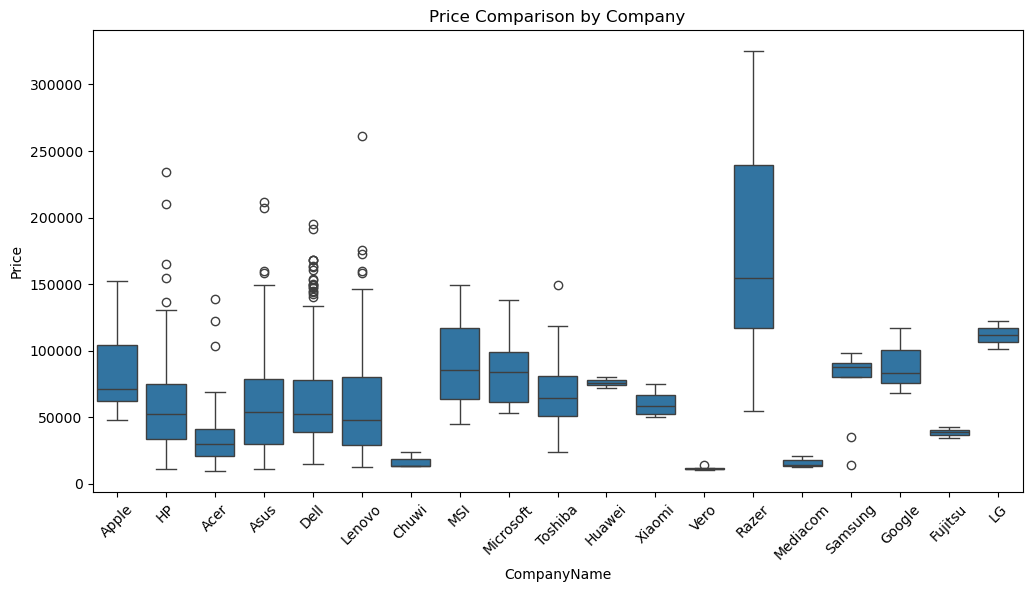

In [44]:
# A box plot is effective for displaying the distribution of prices across different companies, highlighting outliers and the range of prices.
plt.figure(figsize=(12, 6))
sns.boxplot(x='CompanyName', y='Price', data=laptop_data)
plt.title('Price Comparison by Company')
plt.xticks(rotation=45)
plt.show()

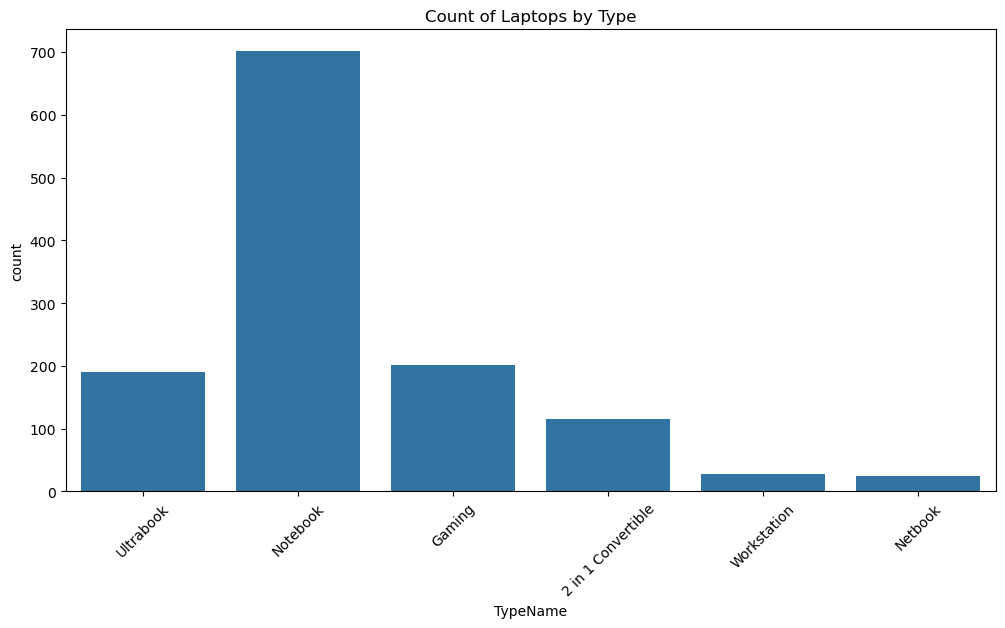

In [45]:
# This gives insight into the most common types in the data.
plt.figure(figsize=(12, 6))
sns.countplot(data=laptop_data, x='TypeName')
plt.xticks(rotation=45)
plt.title("Count of Laptops by Type")
plt.show()

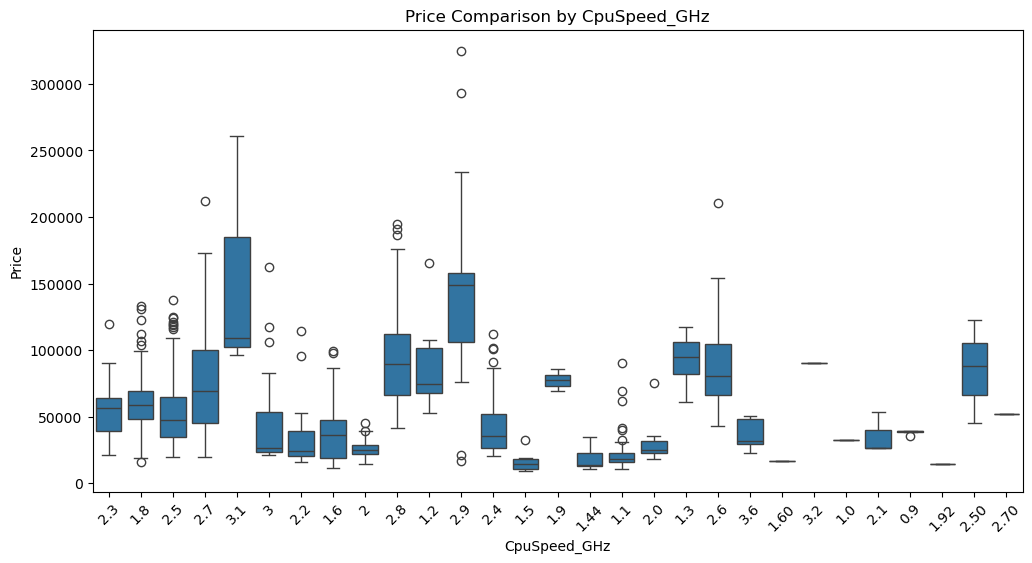

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='CpuSpeed_GHz', y='Price', data=laptop_data)
plt.title('Price Comparison by CpuSpeed_GHz')
plt.xticks(rotation=45)
plt.show()

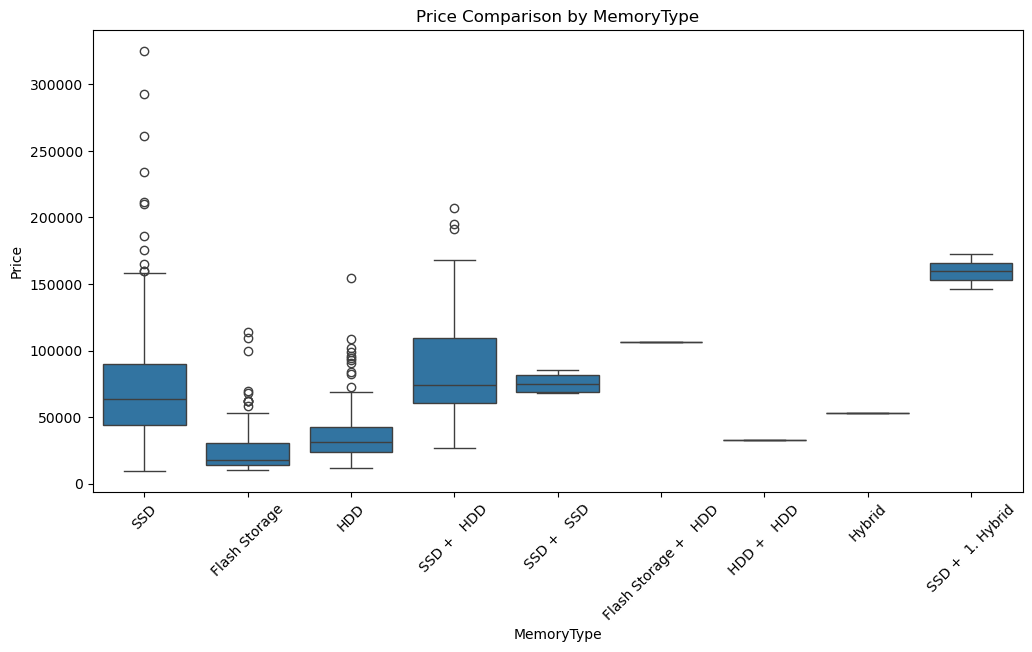

In [47]:
# This will help determine if SSDs or higher storage capacities correspond to higher prices.
plt.figure(figsize=(12, 6))
sns.boxplot(x='MemoryType', y='Price', data=laptop_data)
plt.title('Price Comparison by MemoryType')
plt.xticks(rotation=45)
plt.show()

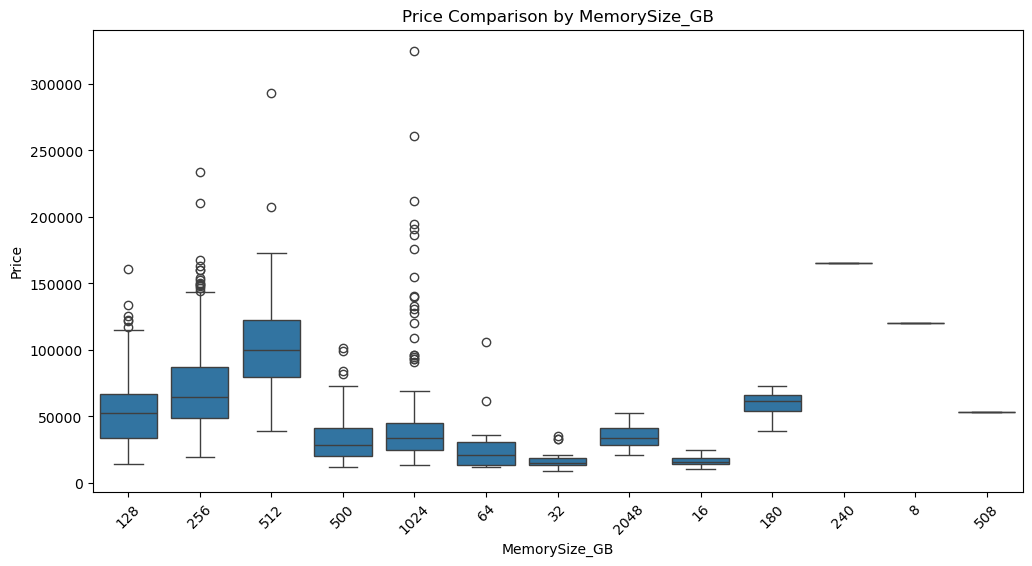

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MemorySize_GB', y='Price', data=laptop_data)
plt.title('Price Comparison by MemorySize_GB')
plt.xticks(rotation=45)
plt.show()

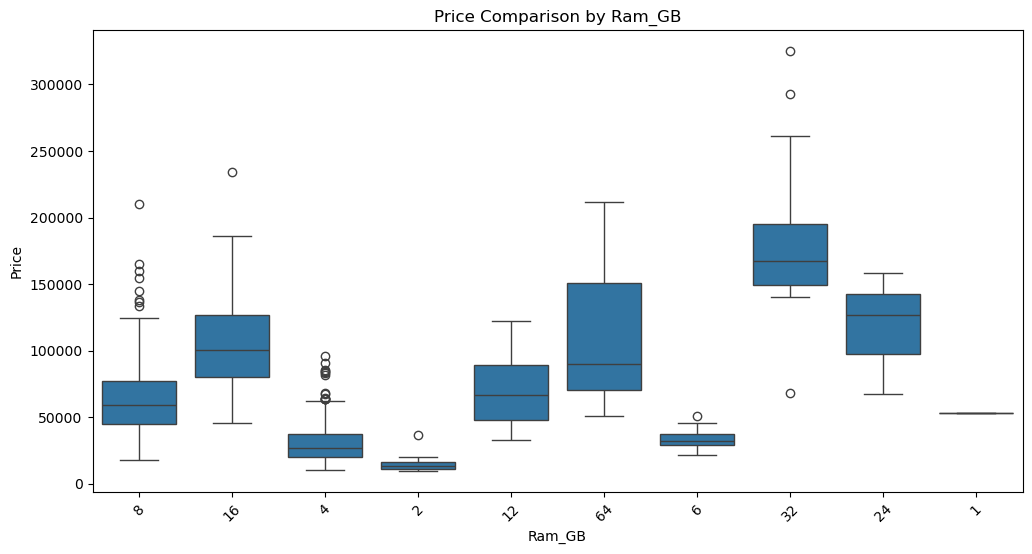

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ram_GB', y='Price', data=laptop_data)
plt.title('Price Comparison by Ram_GB')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
label_encoder = LabelEncoder()
laptop_data['CompanyName'] = label_encoder.fit_transform(laptop_data['CompanyName'])
laptop_data['TypeName'] = label_encoder.fit_transform(laptop_data['TypeName'])
laptop_data['ScreenResolution'] = label_encoder.fit_transform(laptop_data['ScreenResolution'])
laptop_data['CpuProcessor'] = label_encoder.fit_transform(laptop_data['CpuProcessor'])
laptop_data['CpuSpeed_GHz'] = label_encoder.fit_transform(laptop_data['CpuSpeed_GHz'])
laptop_data['MemorySize_GB'] = label_encoder.fit_transform(laptop_data['MemorySize_GB'])
laptop_data['MemoryType'] = label_encoder.fit_transform(laptop_data['MemoryType'])
laptop_data['Gpu'] = label_encoder.fit_transform(laptop_data['Gpu'])
laptop_data['OpSys'] = label_encoder.fit_transform(laptop_data['OpSys'])
laptop_data['Inches'] = label_encoder.fit_transform(laptop_data['Inches'])
laptop_data['Ram_GB'] = label_encoder.fit_transform(laptop_data['Ram_GB'])
laptop_data['Weight_GB'] = label_encoder.fit_transform(laptop_data['Weight_GB'])

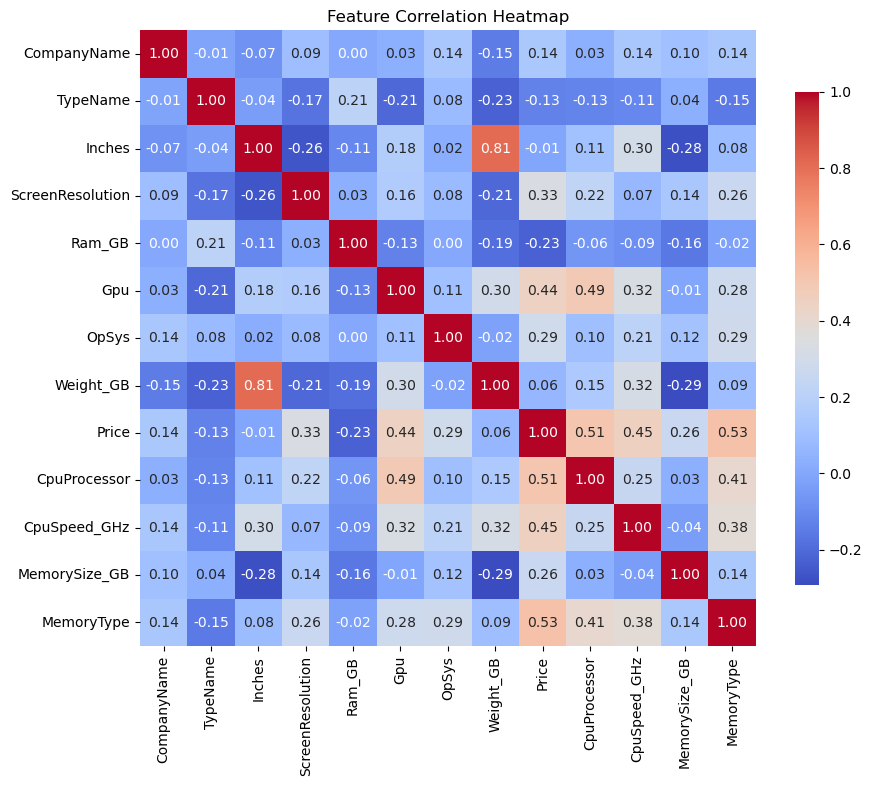

In [52]:
# Calculate correlation matrix
correlation_matrix = laptop_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": 0.8})

# Add titles and labels
plt.title("Feature Correlation Heatmap")
plt.show()

In [53]:
laptop_data['Price'] = laptop_data['Price'].astype('int64')
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1261 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CompanyName       1261 non-null   int32
 1   TypeName          1261 non-null   int32
 2   Inches            1261 non-null   int32
 3   ScreenResolution  1261 non-null   int32
 4   Ram_GB            1261 non-null   int32
 5   Gpu               1261 non-null   int32
 6   OpSys             1261 non-null   int32
 7   Weight_GB         1261 non-null   int32
 8   Price             1261 non-null   int64
 9   CpuProcessor      1261 non-null   int32
 10  CpuSpeed_GHz      1261 non-null   int32
 11  MemorySize_GB     1261 non-null   int32
 12  MemoryType        1261 non-null   int32
dtypes: int32(12), int64(1)
memory usage: 78.8 KB


In [54]:
# Calculate the Inter Quartile Range(IQR) for Price within each Company
Q1 = laptop_data.groupby('CompanyName')['Price'].transform(lambda x: x.quantile(0.25))
Q3 = laptop_data.groupby('CompanyName')['Price'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

# Define outliers as prices beyond 1.5 times the IQR
outlier_upper_limit = Q3 + 1.5 * IQR
outlier_lower_limit = Q1 - 1.5 * IQR

# Flag outliers in the dataset
laptop_data['Price_Outlier'] = ~laptop_data['Price'].between(outlier_lower_limit, outlier_upper_limit)

# Option 2: Cap outliers (Winsorization)
laptop_data['Price_Capped'] = np.where(
    laptop_data['Price'] > outlier_upper_limit, outlier_upper_limit,
    np.where(laptop_data['Price'] < outlier_lower_limit, outlier_lower_limit, laptop_data['Price']))

laptop_data

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,CpuSpeed_GHz,MemorySize_GB,MemoryType,Price_Outlier,Price_Capped
0,1,4,7,23,9,57,8,40,71378,50,16,1,5,False,71378.0
1,1,4,7,1,9,50,8,37,47895,50,9,1,0,False,47895.0
2,7,3,14,8,9,52,4,76,30636,56,18,6,5,False,30636.0
3,1,4,13,25,2,9,8,73,135195,64,21,10,5,False,135195.0
4,1,4,7,23,9,58,8,40,96095,50,26,6,5,False,96095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,10,13,6,46,5,72,33992,65,18,1,5,False,33992.0
1299,10,0,7,19,2,46,5,34,79866,65,18,10,5,False,79866.0
1300,10,3,10,0,3,39,5,52,12201,30,7,11,0,False,12201.0
1301,7,3,14,0,7,21,5,107,40705,65,18,0,2,False,40705.0


In [55]:
# Calculate the IQR for Price within each Memory Type
Q1 = laptop_data.groupby('MemoryType')['Price'].transform(lambda x: x.quantile(0.25))
Q3 = laptop_data.groupby('MemoryType')['Price'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

# Define outliers as prices beyond 1.5 times the IQR
outlier_upper_limit = Q3 + 1.5 * IQR
outlier_lower_limit = Q1 - 1.5 * IQR

# Flag outliers in the dataset
laptop_data['Price_Outlier1'] = ~laptop_data['Price'].between(outlier_lower_limit, outlier_upper_limit)

# Option 2: Cap outliers (Winsorization)
laptop_data['Price_Capped1'] = np.where(
    laptop_data['Price'] > outlier_upper_limit, outlier_upper_limit,
    np.where(laptop_data['Price'] < outlier_lower_limit, outlier_lower_limit, laptop_data['Price']))

laptop_data

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,CpuSpeed_GHz,MemorySize_GB,MemoryType,Price_Outlier,Price_Capped,Price_Outlier1,Price_Capped1
0,1,4,7,23,9,57,8,40,71378,50,16,1,5,False,71378.0,False,71378.0
1,1,4,7,1,9,50,8,37,47895,50,9,1,0,False,47895.0,False,47895.0
2,7,3,14,8,9,52,4,76,30636,56,18,6,5,False,30636.0,False,30636.0
3,1,4,13,25,2,9,8,73,135195,64,21,10,5,False,135195.0,False,135195.0
4,1,4,7,23,9,58,8,40,96095,50,26,6,5,False,96095.0,False,96095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,10,13,6,46,5,72,33992,65,18,1,5,False,33992.0,False,33992.0
1299,10,0,7,19,2,46,5,34,79866,65,18,10,5,False,79866.0,False,79866.0
1300,10,3,10,0,3,39,5,52,12201,30,7,11,0,False,12201.0,False,12201.0
1301,7,3,14,0,7,21,5,107,40705,65,18,0,2,False,40705.0,False,40705.0


In [56]:
# Calculate the IQR for Price within each Memory Size
Q1 = laptop_data.groupby('MemorySize_GB')['Price'].transform(lambda x: x.quantile(0.25))
Q3 = laptop_data.groupby('MemorySize_GB')['Price'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

# Define outliers as prices beyond 1.5 times the IQR
outlier_upper_limit = Q3 + 1.5 * IQR
outlier_lower_limit = Q1 - 1.5 * IQR

# Flag outliers in the dataset
laptop_data['Price_Outlier2'] = ~laptop_data['Price'].between(outlier_lower_limit, outlier_upper_limit)

# Option 2: Cap outliers (Winsorization)
laptop_data['Price_Capped2'] = np.where(
    laptop_data['Price'] > outlier_upper_limit, outlier_upper_limit,
    np.where(laptop_data['Price'] < outlier_lower_limit, outlier_lower_limit, laptop_data['Price']))

laptop_data

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,CpuSpeed_GHz,MemorySize_GB,MemoryType,Price_Outlier,Price_Capped,Price_Outlier1,Price_Capped1,Price_Outlier2,Price_Capped2
0,1,4,7,23,9,57,8,40,71378,50,16,1,5,False,71378.0,False,71378.0,False,71378.0
1,1,4,7,1,9,50,8,37,47895,50,9,1,0,False,47895.0,False,47895.0,False,47895.0
2,7,3,14,8,9,52,4,76,30636,56,18,6,5,False,30636.0,False,30636.0,False,30636.0
3,1,4,13,25,2,9,8,73,135195,64,21,10,5,False,135195.0,False,135195.0,False,135195.0
4,1,4,7,23,9,58,8,40,96095,50,26,6,5,False,96095.0,False,96095.0,False,96095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,10,13,6,46,5,72,33992,65,18,1,5,False,33992.0,False,33992.0,False,33992.0
1299,10,0,7,19,2,46,5,34,79866,65,18,10,5,False,79866.0,False,79866.0,False,79866.0
1300,10,3,10,0,3,39,5,52,12201,30,7,11,0,False,12201.0,False,12201.0,False,12201.0
1301,7,3,14,0,7,21,5,107,40705,65,18,0,2,False,40705.0,False,40705.0,False,40705.0


In [57]:
# Calculate the IQR for Price within each Cpu Speed
Q1 = laptop_data.groupby('CpuSpeed_GHz')['Price'].transform(lambda x: x.quantile(0.25))
Q3 = laptop_data.groupby('CpuSpeed_GHz')['Price'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

# Define outliers as prices beyond 1.5 times the IQR
outlier_upper_limit = Q3 + 1.5 * IQR
outlier_lower_limit = Q1 - 1.5 * IQR

# Flag outliers in the dataset
laptop_data['Price_Outlier3'] = ~laptop_data['Price'].between(outlier_lower_limit, outlier_upper_limit)

# Option 2: Cap outliers (Winsorization)
laptop_data['Price_Capped3'] = np.where(
    laptop_data['Price'] > outlier_upper_limit, outlier_upper_limit,
    np.where(laptop_data['Price'] < outlier_lower_limit, outlier_lower_limit, laptop_data['Price']))

laptop_data

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,...,MemorySize_GB,MemoryType,Price_Outlier,Price_Capped,Price_Outlier1,Price_Capped1,Price_Outlier2,Price_Capped2,Price_Outlier3,Price_Capped3
0,1,4,7,23,9,57,8,40,71378,50,...,1,5,False,71378.0,False,71378.0,False,71378.0,False,71378.0
1,1,4,7,1,9,50,8,37,47895,50,...,1,0,False,47895.0,False,47895.0,False,47895.0,False,47895.0
2,7,3,14,8,9,52,4,76,30636,56,...,6,5,False,30636.0,False,30636.0,False,30636.0,False,30636.0
3,1,4,13,25,2,9,8,73,135195,64,...,10,5,False,135195.0,False,135195.0,False,135195.0,False,135195.0
4,1,4,7,23,9,58,8,40,96095,50,...,6,5,False,96095.0,False,96095.0,False,96095.0,False,96095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,10,13,6,46,5,72,33992,65,...,1,5,False,33992.0,False,33992.0,False,33992.0,False,33992.0
1299,10,0,7,19,2,46,5,34,79866,65,...,10,5,False,79866.0,False,79866.0,False,79866.0,False,79866.0
1300,10,3,10,0,3,39,5,52,12201,30,...,11,0,False,12201.0,False,12201.0,False,12201.0,False,12201.0
1301,7,3,14,0,7,21,5,107,40705,65,...,0,2,False,40705.0,False,40705.0,False,40705.0,False,40705.0


In [58]:
# Calculate the IQR for Price within each Ram
Q1 = laptop_data.groupby('Ram_GB')['Price'].transform(lambda x: x.quantile(0.25))
Q3 = laptop_data.groupby('Ram_GB')['Price'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

# Define outliers as prices beyond 1.5 times the IQR
outlier_upper_limit = Q3 + 1.5 * IQR
outlier_lower_limit = Q1 - 1.5 * IQR

# Flag outliers in the dataset
laptop_data['Price_Outlier4'] = ~laptop_data['Price'].between(outlier_lower_limit, outlier_upper_limit)

# Option 2: Cap outliers (Winsorization)
laptop_data['Price_Capped4'] = np.where(
    laptop_data['Price'] > outlier_upper_limit, outlier_upper_limit,
    np.where(laptop_data['Price'] < outlier_lower_limit, outlier_lower_limit, laptop_data['Price']))

laptop_data

,CompanyName,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_GB,Price,CpuProcessor,...,Price_Outlier,Price_Capped,Price_Outlier1,Price_Capped1,Price_Outlier2,Price_Capped2,Price_Outlier3,Price_Capped3,Price_Outlier4,Price_Capped4
0,1,4,7,23,9,57,8,40,71378,50,...,False,71378.0,False,71378.0,False,71378.0,False,71378.0,False,71378.0
1,1,4,7,1,9,50,8,37,47895,50,...,False,47895.0,False,47895.0,False,47895.0,False,47895.0,False,47895.0
2,7,3,14,8,9,52,4,76,30636,56,...,False,30636.0,False,30636.0,False,30636.0,False,30636.0,False,30636.0
3,1,4,13,25,2,9,8,73,135195,64,...,False,135195.0,False,135195.0,False,135195.0,False,135195.0,False,135195.0
4,1,4,7,23,9,58,8,40,96095,50,...,False,96095.0,False,96095.0,False,96095.0,False,96095.0,False,96095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,10,13,6,46,5,72,33992,65,...,False,33992.0,False,33992.0,False,33992.0,False,33992.0,False,33992.0
1299,10,0,7,19,2,46,5,34,79866,65,...,False,79866.0,False,79866.0,False,79866.0,False,79866.0,False,79866.0
1300,10,3,10,0,3,39,5,52,12201,30,...,False,12201.0,False,12201.0,False,12201.0,False,12201.0,False,12201.0
1301,7,3,14,0,7,21,5,107,40705,65,...,False,40705.0,False,40705.0,False,40705.0,False,40705.0,False,40705.0


# Data Modelling

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Separate target and features
y = laptop_data["Price"]
X = laptop_data.drop(["Price"], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train_scaled, y_train)
print(model.score(X_test_scaled,y_test)*100)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R^2 Score: {r2 * 100:.2f}%")
print(f"RMSE: {rmse:.2f}")

98.97592486991805
R^2 Score: 98.98%
RMSE: 3810.48


# Conclusion

The model has shown us that the major parameters involved in the prediction of laptop prices are:
* Company Name
* Ram_GB
* CpuSpeed_GHz
* MemorySize_GB
* MemoryType

While the others may have a little impact in the prediction of laptop prices. The above mentioned have major effect on the prices more than the others.